In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [2]:
data = pd.read_csv('diabetes.csv')
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot: >

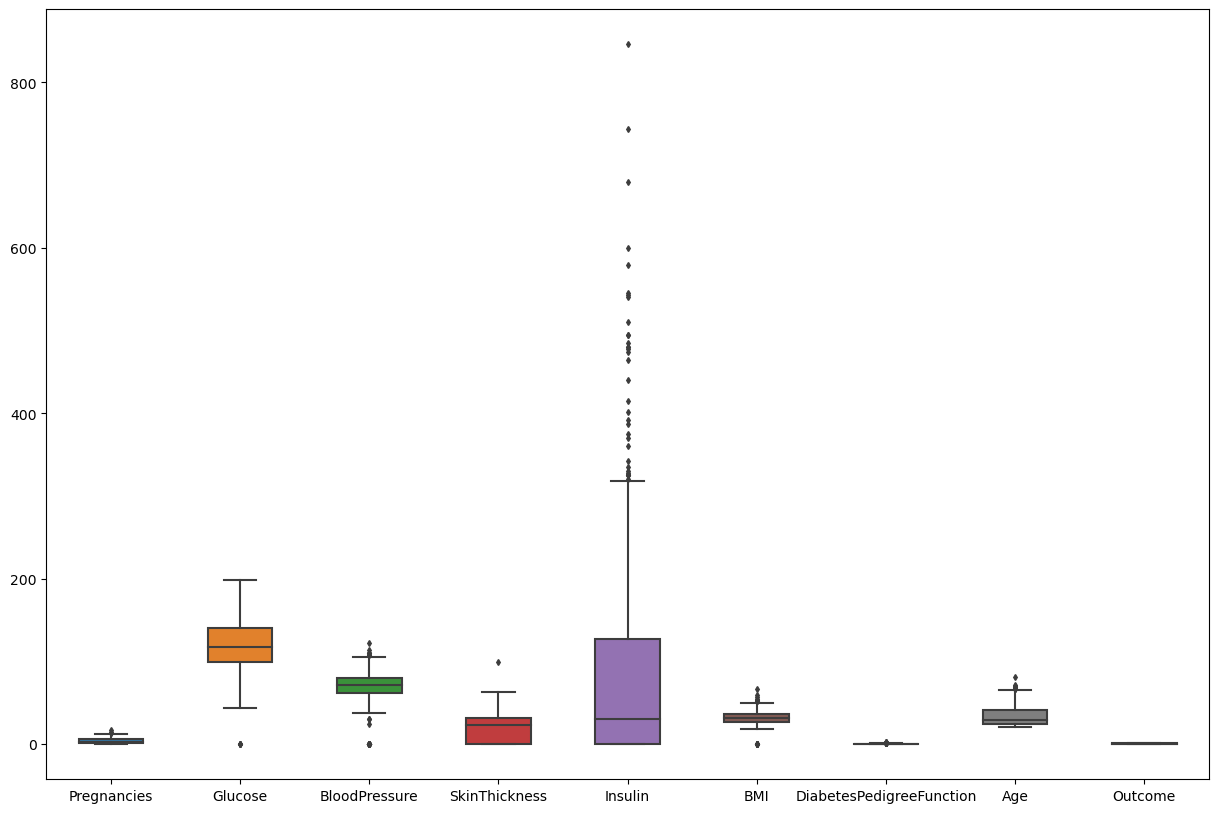

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5, fliersize=3)

## Insulin has huge numbers of outlier data.

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## All the datatypes are either float or integer. Therefore, there is no need to transform the datatypes into dummy variables.

## The minimum values of most of the rows are found to be zero. However, it is not good to have the minimum values as zero. Therefore, the values except the Pregnancies are replaced by the mean values.

In [7]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [9]:
X = data.drop(columns=['Outcome'])
y= data['Outcome']

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.25, random_state=25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 123.5\nentropy = 0.941\nsamples = 576\nvalue = [370, 206]'),
 Text(0.25, 0.625, 'x[5] <= 26.45\nentropy = 0.679\nsamples = 329\nvalue = [270, 59]'),
 Text(0.125, 0.375, 'x[4] <= 48.5\nentropy = 0.087\nsamples = 91\nvalue = [90, 1]'),
 Text(0.0625, 0.125, 'entropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 83\nvalue = [83, 0]'),
 Text(0.375, 0.375, 'x[1] <= 94.5\nentropy = 0.801\nsamples = 238\nvalue = [180, 58]'),
 Text(0.3125, 0.125, 'entropy = 0.347\nsamples = 77\nvalue = [72, 5]'),
 Text(0.4375, 0.125, 'entropy = 0.914\nsamples = 161\nvalue = [108, 53]'),
 Text(0.75, 0.625, 'x[1] <= 161.5\nentropy = 0.974\nsamples = 247\nvalue = [100, 147]'),
 Text(0.625, 0.375, 'x[5] <= 26.25\nentropy = 0.999\nsamples = 168\nvalue = [87, 81]'),
 Text(0.5625, 0.125, 'entropy = 0.485\nsamples = 19\nvalue = [17, 2]'),
 Text(0.6875, 0.125, 'entropy = 0.997\nsamples = 149\nvalue = [70, 79]'),
 Text(0.875, 0.375, 'x[7] <= 53.5\nentrop

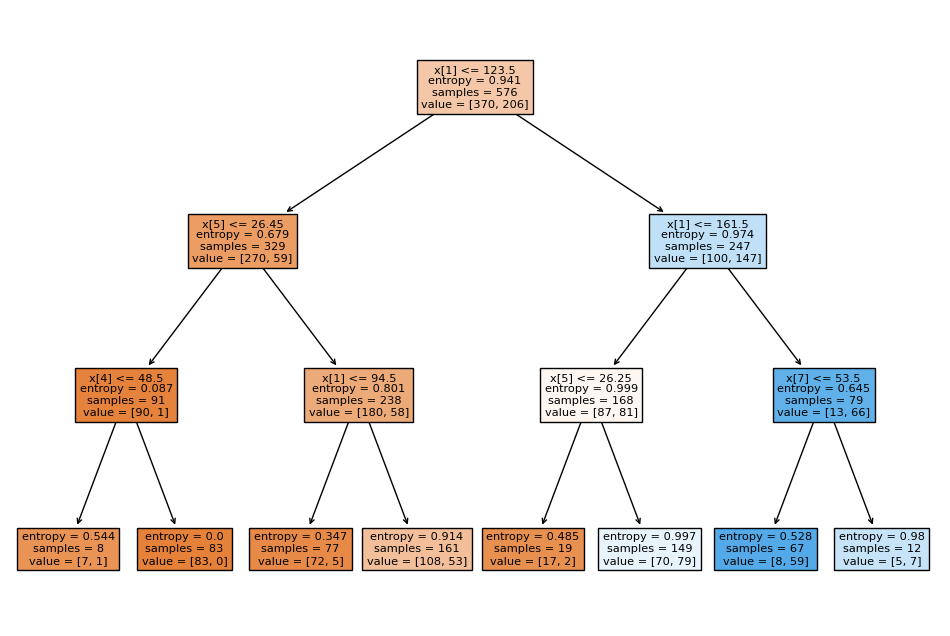

In [14]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(classifier,filled=True)

In [15]:
## prediction
y_pred=classifier.predict(X_test)
print(y_pred)

[0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 0 1]


In [16]:
# Hyperparameter Tunning
import warnings
warnings.filterwarnings('ignore')
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [17]:
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.7552083333333334
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       129
           1       0.63      0.62      0.62        63

    accuracy                           0.76       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192



In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
y_pred= clf.predict(X_test_scaled)
print(clf.best_score_)
print(clf.best_params_)

0.7221739130434782
{'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'splitter': 'random'}


In [19]:
from sklearn.metrics import confusion_matrix
conf_mat= confusion_matrix(y_test, y_pred)
conf_mat


array([[128,   2],
       [ 55,   7]])

In [20]:
true_positive= conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [21]:
Accuracy= (true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
Accuracy

0.703125

In [22]:
precision= true_positive/(true_positive+false_positive)
precision

0.9846153846153847

In [23]:
recall=true_positive/(true_positive+false_negative)
recall

0.6994535519125683

In [24]:
F1_score= 2*(recall*precision)/(recall+precision)
F1_score

0.817891373801917

## Here the Preciso shows the highest value of 100%. 

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

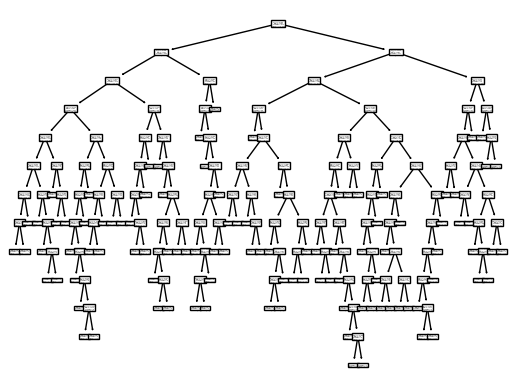

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)
plot_tree(clf)
plt.show()

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [39]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Accuracy on test set: {:.2f}".format(score))
X_new = X_test.copy()
X_new = X_new * .5   # multiply petal length by 1.5
score_new = clf.score(X_new, y_test)
print("Accuracy on modified dataset: {:.2f}".format(score_new))

Accuracy on test set: 0.71
Accuracy on modified dataset: 0.66
